In [1]:
import pandas as pd

In [5]:
# import dataset
data = pd.read_csv("/Users/sanketdhameliya/Downloads/diabetes.csv")

# Part I : EDA - Exploratory Data Analysis

In [6]:
# looking informations which are available in dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Check for missing values in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

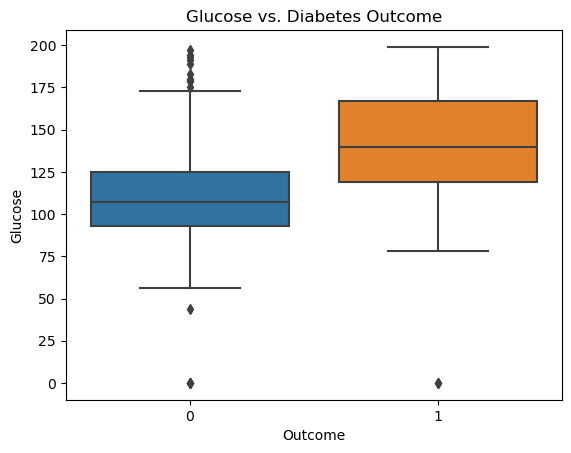

In [10]:
# predictor variables are related to the outcome variable (Diabetes)

# Visualize Glucose distribution for Diabetic and Non-Diabetic individuals
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose vs. Diabetes Outcome')
plt.show()

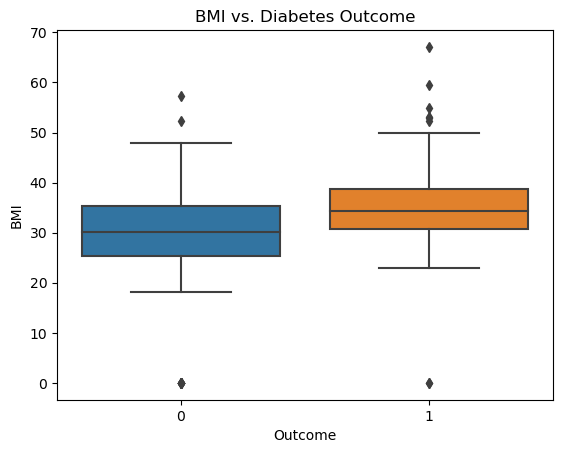

In [11]:
# Visualize BMI distribution for Diabetic and Non-Diabetic individuals
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('BMI vs. Diabetes Outcome')
plt.show()

In [12]:
# calculate the correlation matrix and visualize it using a heatmap

# Compute the correlation matrix
correlation_matrix = data.corr()


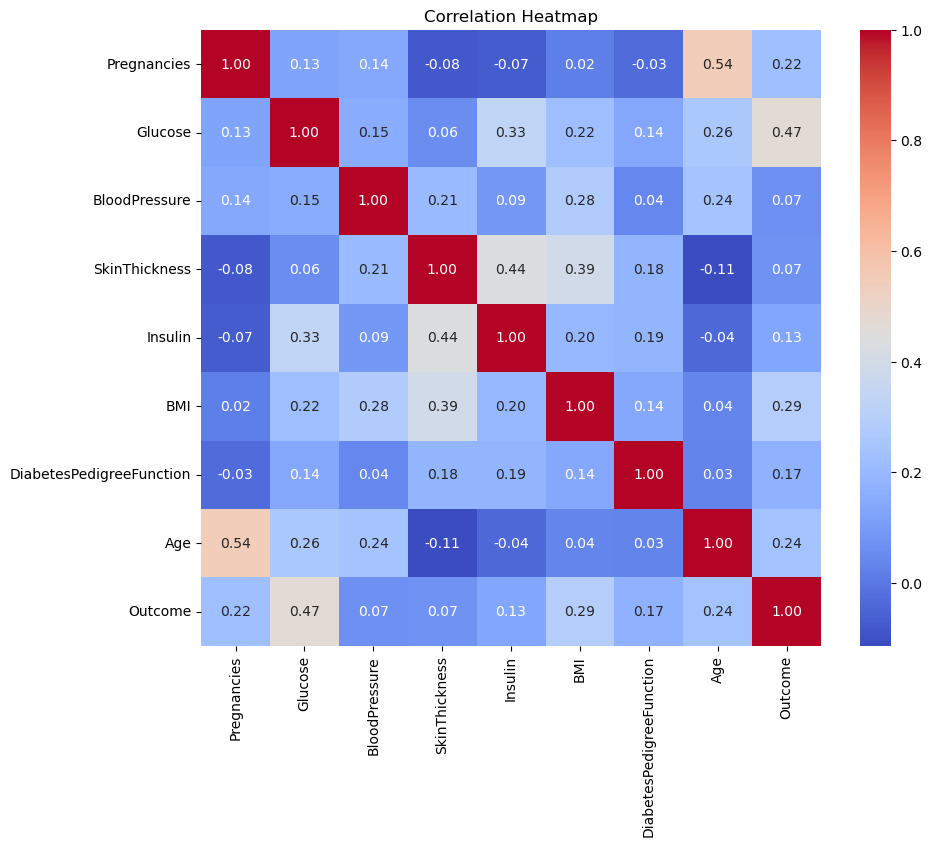

In [13]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

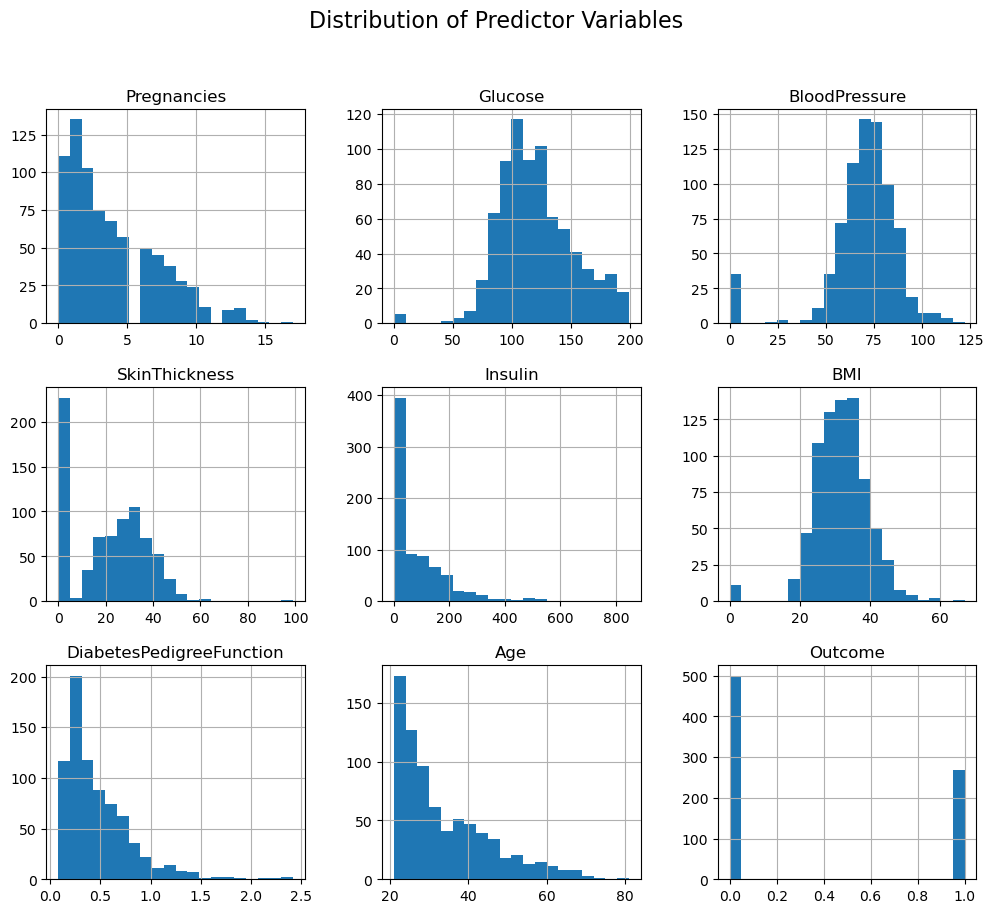

In [14]:
# create histograms to examine the distribution of each predictor variable.

# Create histograms for all predictor variables
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Predictor Variables', fontsize=16)
plt.show()

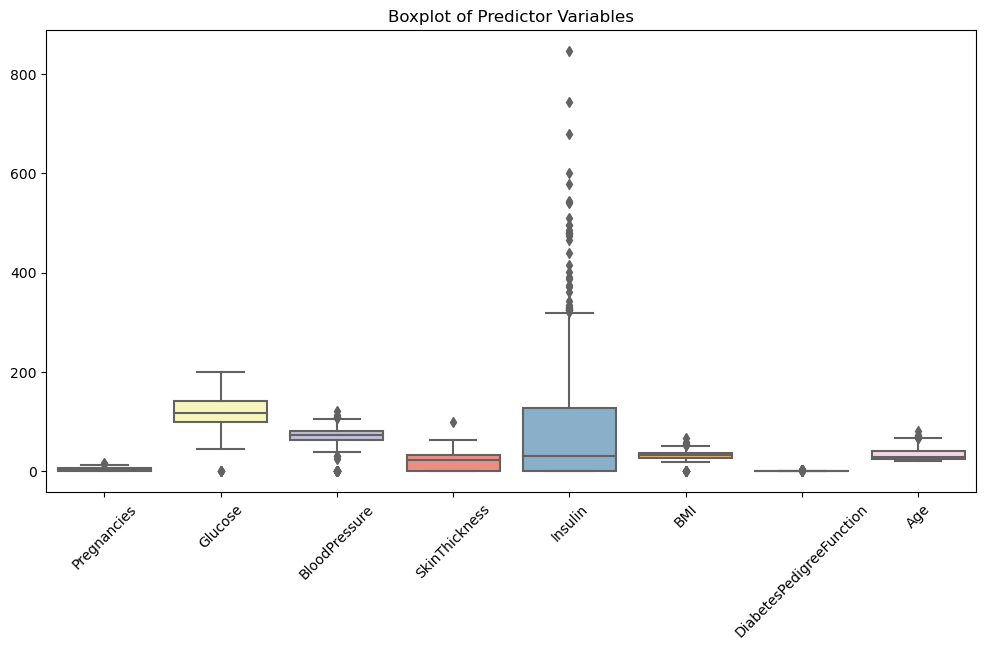

In [15]:
# box plots to detect outliers in the predictor variables

# Create box plots for each predictor variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns='Outcome'), palette='Set3')
plt.title('Boxplot of Predictor Variables')
plt.xticks(rotation=45)
plt.show()

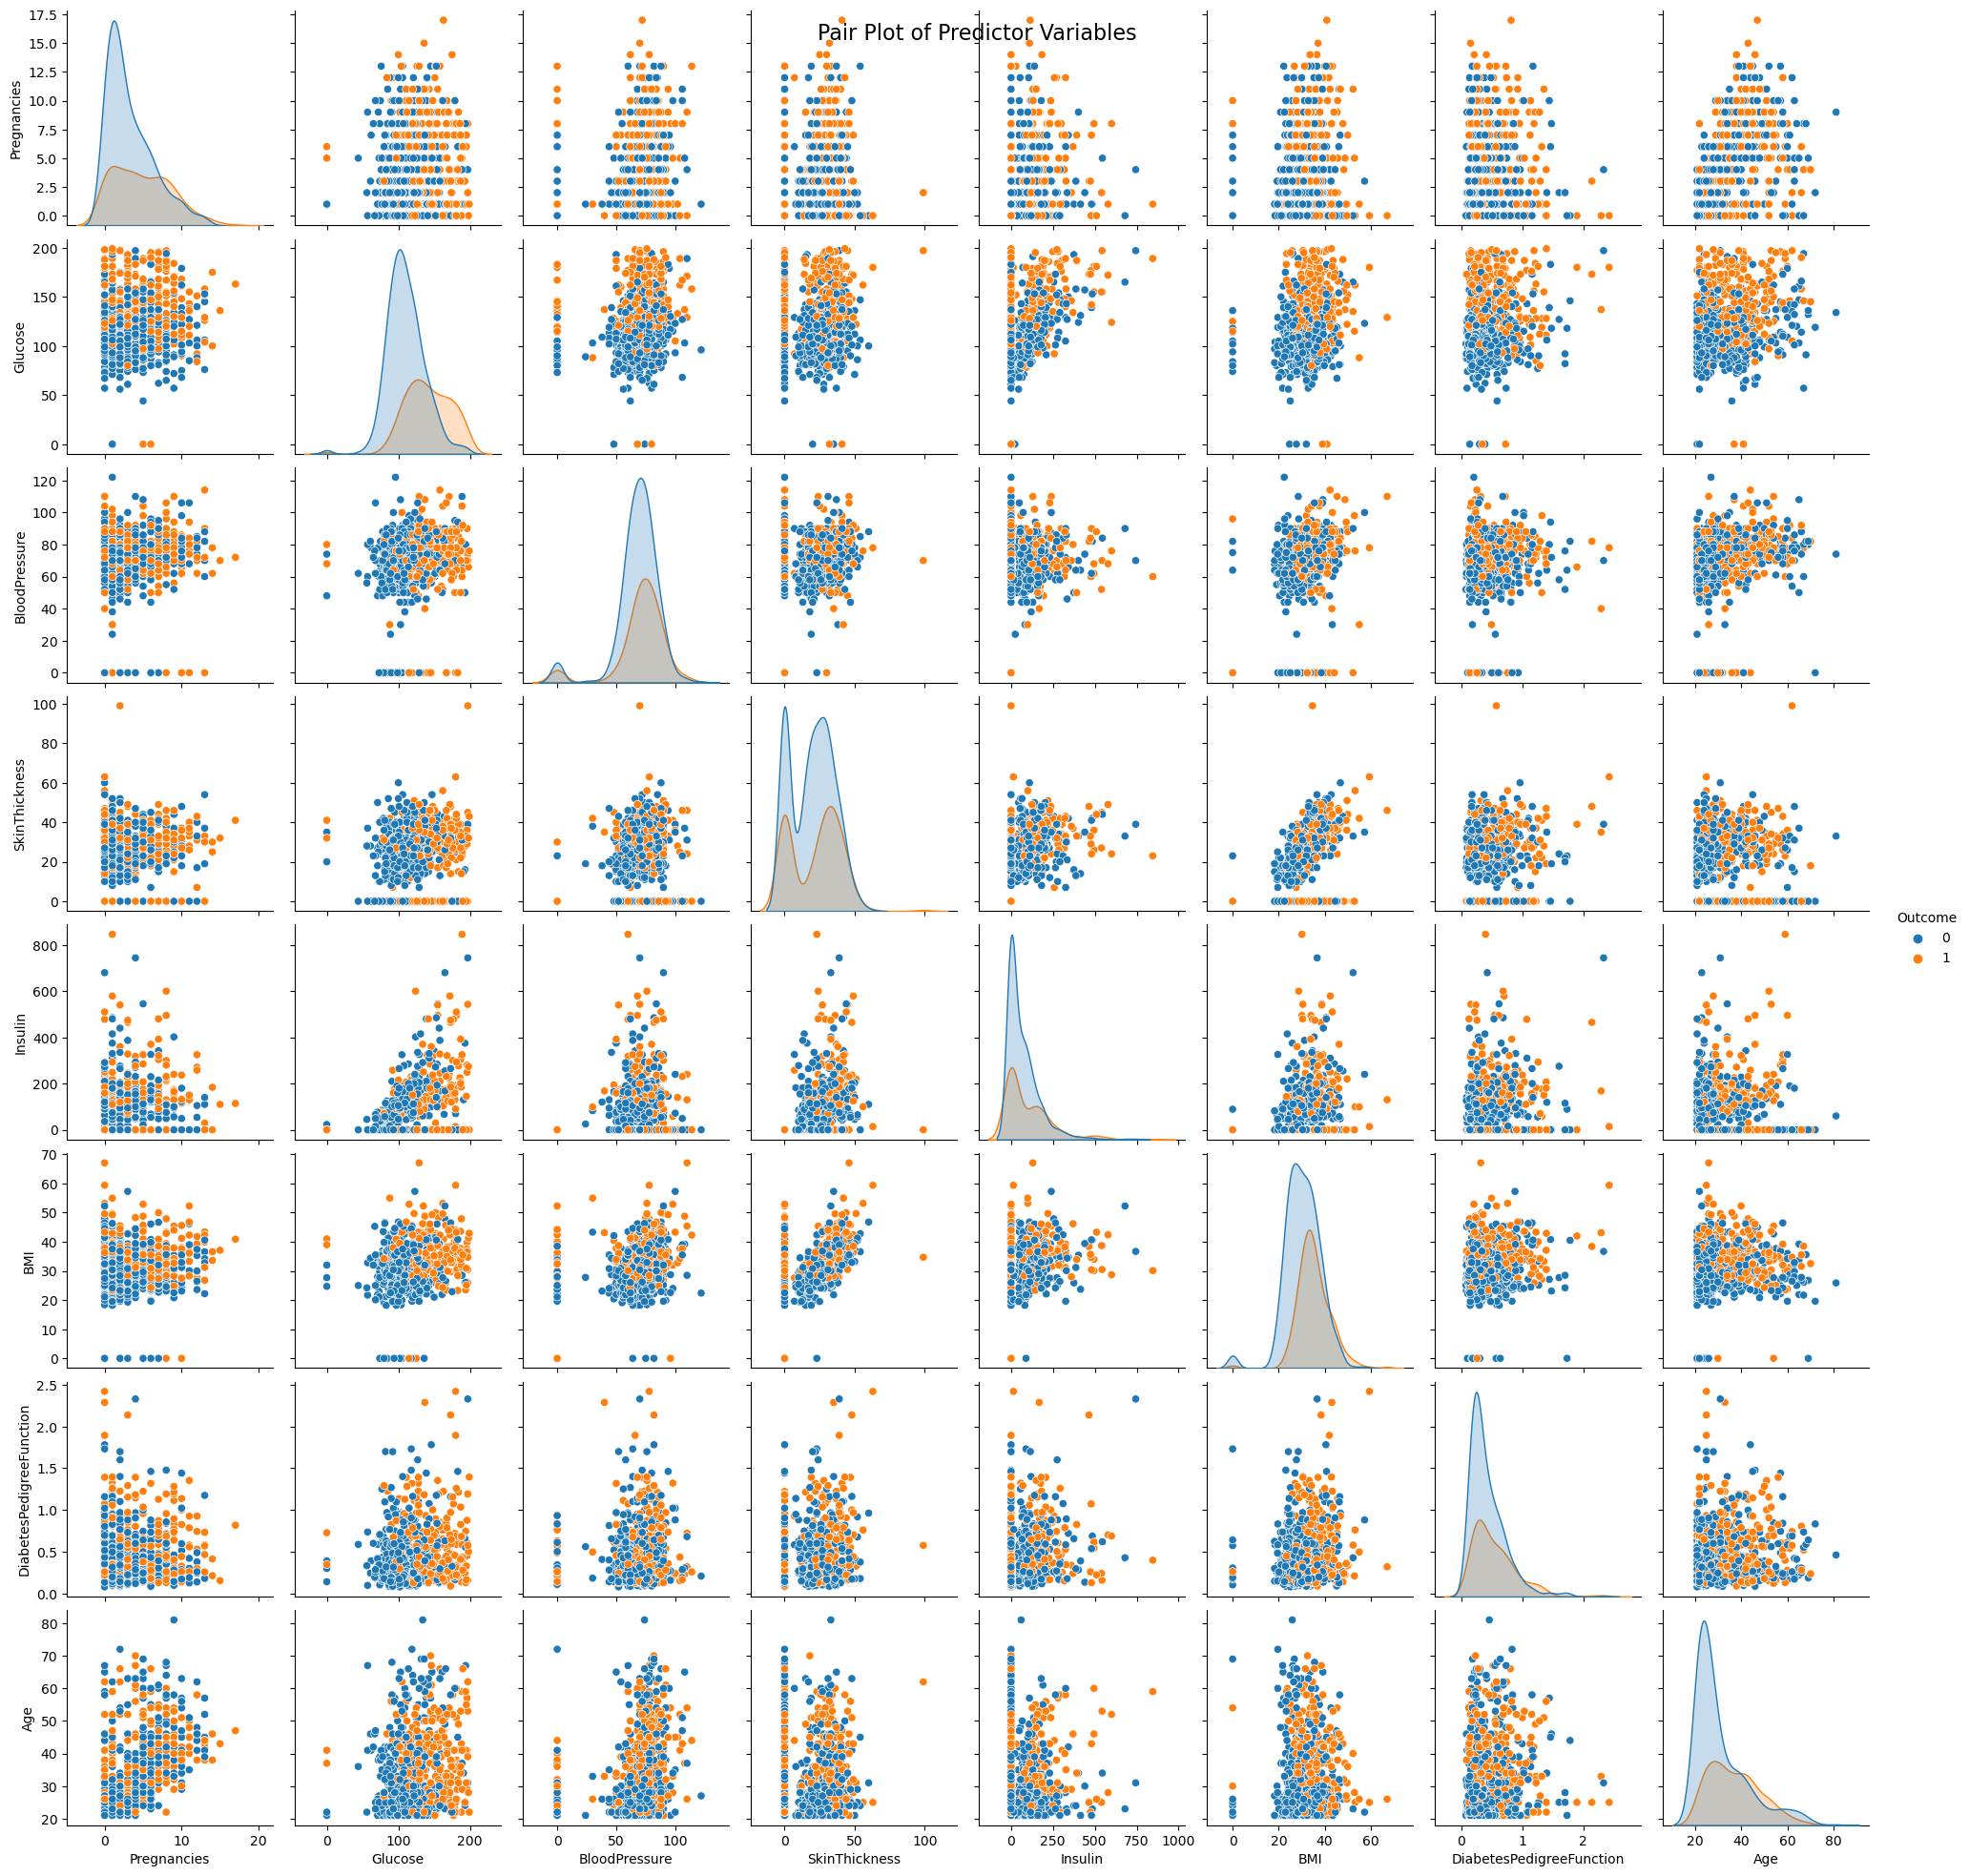

In [16]:
# pair plots to explore relationships between predictor variables

# Create a pair plot for the predictor variables
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Predictor Variables', fontsize=16)
plt.show()

In [17]:
# calculate the average age, glucose level, and BMI for individuals with diabetes and without diabetes separately

# Calculate the average age for diabetic and non-diabetic individuals
avg_age_diabetic = data[data['Outcome'] == 1]['Age'].mean()
avg_age_non_diabetic = data[data['Outcome'] == 0]['Age'].mean()

# Calculate the average glucose level for diabetic and non-diabetic individuals
avg_glucose_diabetic = data[data['Outcome'] == 1]['Glucose'].mean()
avg_glucose_non_diabetic = data[data['Outcome'] == 0]['Glucose'].mean()

# Calculate the average BMI for diabetic and non-diabetic individuals
avg_bmi_diabetic = data[data['Outcome'] == 1]['BMI'].mean()
avg_bmi_non_diabetic = data[data['Outcome'] == 0]['BMI'].mean()

print("Average Age (Diabetic):", avg_age_diabetic)
print("Average Age (Non-Diabetic):", avg_age_non_diabetic)

print("Average Glucose (Diabetic):", avg_glucose_diabetic)
print("Average Glucose (Non-Diabetic):", avg_glucose_non_diabetic)

print("Average BMI (Diabetic):", avg_bmi_diabetic)
print("Average BMI (Non-Diabetic):", avg_bmi_non_diabetic)

Average Age (Diabetic): 37.06716417910448
Average Age (Non-Diabetic): 31.19
Average Glucose (Diabetic): 141.25746268656715
Average Glucose (Non-Diabetic): 109.98
Average BMI (Diabetic): 35.14253731343278
Average BMI (Non-Diabetic): 30.30419999999996


# Part II : Preprocessing & Feature Engineering

In [18]:
# Handling missing values using imputation
data.fillna(data.mean(), inplace=True)

In [19]:
# Define a function to handle outliers
def winsorize_outliers(column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply def to columns with outliers
columns_with_outliers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in columns_with_outliers:
    winsorize_outliers(col)

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the predictor variables
scaled_data = data.drop(columns='Outcome') # Drop the outcome variable before scaling
data_scaled = pd.DataFrame(scaler.fit_transform(scaled_data), columns=scaled_data.columns)

# Add the Outcome column back to the scaled data
data_scaled['Outcome'] = data['Outcome']

In [29]:
# Feature Engineering: BMI Category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['BMI_Category'] = data['BMI'].apply(categorize_bmi)

# Encode the "BMI_Category" feature into numerical dummy variables
data_encoded = pd.get_dummies(data, columns=['BMI_Category'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop(columns='Outcome')
y = data_encoded['Outcome']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Part III : Training ML Model


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [34]:
# Separate features and target variable
X = data_scaled.drop(columns=['Outcome', 'BMI_Category'])
y = data_scaled['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC-AUC:", roc_auc)

# Evaluate both models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Evaluation:
Accuracy: 0.73
Precision: 0.7008547008547008
Recall: 0.8118811881188119
F1-score: 0.7522935779816514
ROC-AUC: 0.7291729172917292
Random Forest Evaluation:
Accuracy: 0.825
Precision: 0.7844827586206896
Recall: 0.900990099009901
F1-score: 0.8387096774193549
ROC-AUC: 0.824232423242324


/Users/sanketdhameliya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the Random Forest model outperforms the Logistic Regression model in most of the metrics:

-Accuracy: 
Random Forest (0.825) > Logistic Regression (0.73)

-Precision: 
Random Forest (0.784) > Logistic Regression (0.701)

-Recall: 
Random Forest (0.901) > Logistic Regression (0.812)

-F1-score: 
Random Forest (0.839) > Logistic Regression (0.752)

-ROC-AUC: 
Random Forest (0.824) > Logistic Regression (0.729)


The Random Forest model consistently achieves higher values for accuracy, precision, recall, F1-score, and ROC-AUC, indicating better performance overall.

Therefore, based on the provided evaluation metrics, the Random Forest model appears to be the better choice for predicting diabetes in new data for this specific task. It shows a good balance between precision and recall, which is important for binary classification tasks, especially when the data is imbalanced.




# # Part IV : Conclusion

based on the machine learning models developed and the exploratory data analysis (EDA) conducted on the "Diabetes" dataset, here are four key findings:

Model Performance: The Random Forest model outperformed the Logistic Regression model in all key evaluation metrics, including accuracy, precision, recall, F1-score, and ROC-AUC. It consistently achieved higher values, indicating better overall performance for predicting diabetes in new data.

Feature Importance: During the EDA, it was observed that Glucose, BMI, and Age were among the most important features for predicting diabetes. Glucose level, BMI (Body Mass Index), and the patient's age had significant impacts on the model's predictions, which aligns with existing medical knowledge on diabetes risk factors.

Handling Imbalanced Data: The use of SMOTE (Synthetic Minority Over-sampling Technique) during preprocessing helped to address the class imbalance in the dataset. This approach generated synthetic samples of the minority class (diabetic) to balance the data and improve model performance, especially in terms of recall and F1-score.

Data Preprocessing: Preprocessing steps, including handling missing values, outliers, and scaling features, were crucial for improving model performance. Additionally, feature engineering, such as categorizing BMI into different groups, provided additional insights into the relationship between predictors and the outcome.

